In [ ]:
# word Embedding

In [1]:
import nltk

from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re

paragraph = """I have three visions for India. In 3000 years of our history, people from all over 
               the world have come and invaded us, captured our lands, conquered our minds. 
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours. 
               Yet we have not done this to any other nation. We have not conquered anyone. 
               We have not grabbed their land, their culture, 
               their history and tried to enforce our way of life on them. 
               Why? Because we respect the freedom of others.That is why my 
               first vision is that of freedom. I believe that India got its first vision of 
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision for India’s development. For fifty years we have been a developing nation.
               It is time we see ourselves as a developed nation. We are among the top 5 nations of the world
               in terms of GDP. We have a 10 percent growth rate in most areas. Our poverty levels are falling.
               Our achievements are being globally recognised today. Yet we lack the self-confidence to
               see ourselves as a developed nation, self-reliant and self-assured. Isn’t this incorrect?
               I have a third vision. India must stand up to the world. Because I believe that unless India 
               stands up to the world, no one will respect us. Only strength respects strength. We must be 
               strong not only as a military power but also as an economic power. Both must go hand-in-hand. 
               My good fortune was to have worked with three great minds. Dr. Vikram Sarabhai of the Dept. of 
               space, Professor Satish Dhawan, who succeeded him and Dr. Brahm Prakash, father of nuclear material.
               I was lucky to have worked with all three of them closely and consider this the great opportunity of my life.
               I see four milestones in my career"""

In [2]:
# Preprocessing the data  (for more details on regular expression visit https://regexr.com/)
text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text)

text = text.lower()

text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [3]:
# Preparing the dataset
sentences = nltk.sent_tokenize(text)
sentences

['i have three visions for india.',
 'in years of our history, people from all over the world have come and invaded us, captured our lands, conquered our minds.',
 'from alexander onwards, the greeks, the turks, the moguls, the portuguese, the british, the french, the dutch, all of them came and looted us, took over what was ours.',
 'yet we have not done this to any other nation.',
 'we have not conquered anyone.',
 'we have not grabbed their land, their culture, their history and tried to enforce our way of life on them.',
 'why?',
 'because we respect the freedom of others.that is why my first vision is that of freedom.',
 'i believe that india got its first vision of this in , when we started the war of independence.',
 'it is this freedom that we must protect and nurture and build on.',
 'if we are not free, no one will respect us.',
 'my second vision for india’s development.',
 'for fifty years we have been a developing nation.',
 'it is time we see ourselves as a developed nati

In [4]:
sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

In [5]:
sent_word

[['i', 'have', 'three', 'visions', 'for', 'india', '.'],
 ['in',
  'years',
  'of',
  'our',
  'history',
  ',',
  'people',
  'from',
  'all',
  'over',
  'the',
  'world',
  'have',
  'come',
  'and',
  'invaded',
  'us',
  ',',
  'captured',
  'our',
  'lands',
  ',',
  'conquered',
  'our',
  'minds',
  '.'],
 ['from',
  'alexander',
  'onwards',
  ',',
  'the',
  'greeks',
  ',',
  'the',
  'turks',
  ',',
  'the',
  'moguls',
  ',',
  'the',
  'portuguese',
  ',',
  'the',
  'british',
  ',',
  'the',
  'french',
  ',',
  'the',
  'dutch',
  ',',
  'all',
  'of',
  'them',
  'came',
  'and',
  'looted',
  'us',
  ',',
  'took',
  'over',
  'what',
  'was',
  'ours',
  '.'],
 ['yet',
  'we',
  'have',
  'not',
  'done',
  'this',
  'to',
  'any',
  'other',
  'nation',
  '.'],
 ['we', 'have', 'not', 'conquered', 'anyone', '.'],
 ['we',
  'have',
  'not',
  'grabbed',
  'their',
  'land',
  ',',
  'their',
  'culture',
  ',',
  'their',
  'history',
  'and',
  'tried',
  'to',
  'e

In [6]:
#sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

for i in range(len(sent_word)):
    sent_word[i] = [word for word in sent_word[i]
                    if word not in stopwords.words('english')]

In [7]:
sent_word

[['three', 'visions', 'india', '.'],
 ['years',
  'history',
  ',',
  'people',
  'world',
  'come',
  'invaded',
  'us',
  ',',
  'captured',
  'lands',
  ',',
  'conquered',
  'minds',
  '.'],
 ['alexander',
  'onwards',
  ',',
  'greeks',
  ',',
  'turks',
  ',',
  'moguls',
  ',',
  'portuguese',
  ',',
  'british',
  ',',
  'french',
  ',',
  'dutch',
  ',',
  'came',
  'looted',
  'us',
  ',',
  'took',
  '.'],
 ['yet', 'done', 'nation', '.'],
 ['conquered', 'anyone', '.'],
 ['grabbed',
  'land',
  ',',
  'culture',
  ',',
  'history',
  'tried',
  'enforce',
  'way',
  'life',
  '.'],
 ['?'],
 ['respect', 'freedom', 'others.that', 'first', 'vision', 'freedom', '.'],
 ['believe',
  'india',
  'got',
  'first',
  'vision',
  ',',
  'started',
  'war',
  'independence',
  '.'],
 ['freedom', 'must', 'protect', 'nurture', 'build', '.'],
 ['free', ',', 'one', 'respect', 'us', '.'],
 ['second', 'vision', 'india', '’', 'development', '.'],
 ['fifty', 'years', 'developing', 'nation', '.'

In [8]:
# Training the Word2Vec model
model = Word2Vec(sent_word, min_count=1)


words = model.wv.vocab

In [9]:
# Test the word vectors
vector = model.wv['freedom']

print(vector)

[-4.79368027e-03  2.06507029e-04  4.63557523e-03 -6.27834117e-04
 -1.31199288e-03  2.53522914e-04 -4.92765941e-03 -2.56533688e-03
 -2.87184911e-03  3.58649227e-03  1.51201361e-03 -4.62443306e-04
  4.47809929e-03  2.64534564e-03  3.12542100e-03  3.72752710e-03
  2.47881655e-03 -2.97170016e-04 -4.95039672e-03 -3.77801573e-03
  8.27381329e-04  2.72642542e-03  8.09253033e-05  1.70959777e-03
  1.52371568e-03 -1.35043485e-03  5.21947281e-04 -7.65840057e-04
  2.86752288e-03 -2.59806239e-03  3.48968618e-03  4.88489342e-04
  4.34632832e-03 -3.59575939e-03  1.82584499e-03 -2.07021530e-03
 -1.03639075e-04  4.16718842e-03  4.87303082e-03  4.60003223e-03
  3.34686972e-03  3.41323018e-03 -4.35872655e-03  1.55317888e-03
  4.93087200e-03  6.56268967e-04 -3.67353554e-03  1.00490870e-03
 -3.05898814e-03 -3.93597269e-03 -3.70955700e-03  2.11413065e-03
  3.02194129e-03  4.57090372e-03  3.69848078e-03  3.57574434e-03
  4.26176935e-03  3.73455859e-03 -3.59935133e-04  4.71498875e-04
 -1.94800377e-03 -2.43910

In [11]:
# Most similar words
similar = model.wv.most_similar('power',topn=5)

similar

[('satish', 0.2758009433746338),
 ('must', 0.23765236139297485),
 ('prakash', 0.21427346765995026),
 ('greeks', 0.21297518908977509),
 ('land', 0.20855072140693665)]

In [12]:
# Same words similarity
model.wv.similarity(w1='freedom',w2='freedom')

1.0

In [13]:
# filter on non similarity
model.wv.doesnt_match(["power","war","freedom"])

C:\Users\Vikash\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'power'

C:\Users\Vikash\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


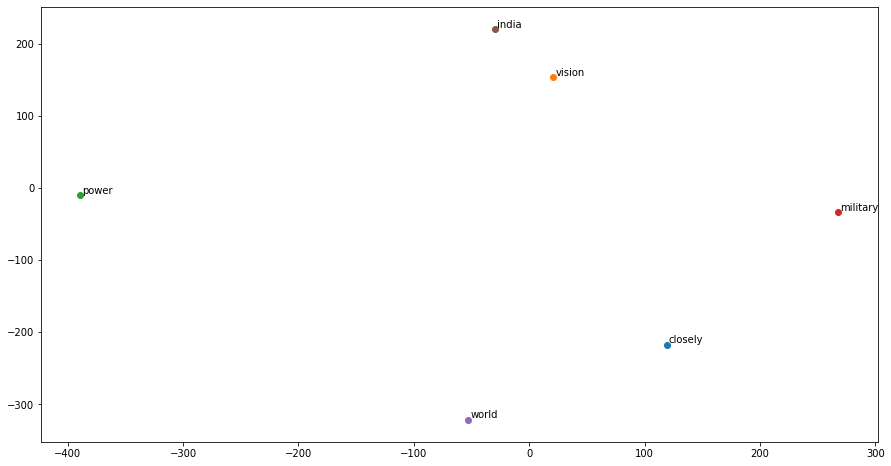

In [14]:
from sklearn.manifold import  TSNE
vocab = ['closely','vision','power','military','world','india']
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=3, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model)